## Arrhenius equation

[![Hits](https://hits.seeyoufarm.com/api/count/incr/badge.svg?url=https%3A%2F%2Fgithub.com%2Fthereexist%2FPhysical_chemistry_3%2Fblob%2Fmain%2FChemical_equilibrium%2FArrhenius_equation.ipynb&count_bg=%2379C83D&title_bg=%23555555&icon=&icon_color=%23E7E7E7&title=hits&edge_flat=false)](https://hits.seeyoufarm.com)

이전에 Ammonia 합성과 관련해서 보았던 $K_f$의 식을 다시 봐보겠습니다.

$$K_f = \exp \left( - \triangle_r G^\circ / RT \right) = \frac{\prod_j \left(q_{P_j}\right)^{\nu_{P_j}}}{\prod_i \left(q_{R_i}\right)^{\nu_{R_i}}} \times \left( \frac{k_B T}{P^\circ V} \right)^{\sum_j \nu_{P_j} - \sum_i \nu_{R_i}}$$

수업시간에 이 식에 대해서 이야기를 할 때, $K_f = K_\gamma K_P$ 인 것과, 충분히 낮은 압력에서는 $K_\gamma$가 거의 1이라는 사실을 언급한 바 있습니다.

이러한 것을 고려했을 때, 위의 식의 일부분을 다음과 같이 쓸 수 있습니다.

$$\ln K_P \cong -\frac{\triangle_r G^\circ}{RT}$$

또한, $G=H-TS$ 라는 조건을 추가적으로 사용하게 되면,

$$\ln K_P \cong -\frac{\triangle_r H^\circ}{RT} + \frac{\triangle_r S^\circ}{R} \equiv -\frac{\triangle_r H^\circ}{RT} + C$$

라고 쓸 수 있습니다. 위의 식은 Van't Hoff equation이라는 식으로 잘 알려져 있습니다.

(https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Physical_Chemistry_(LibreTexts)/26%3A_Chemical_Equilibrium/26.07%3A_The_Van_'t_Hoff_Equation)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from ammonia_synthesis import *
import numpy as np


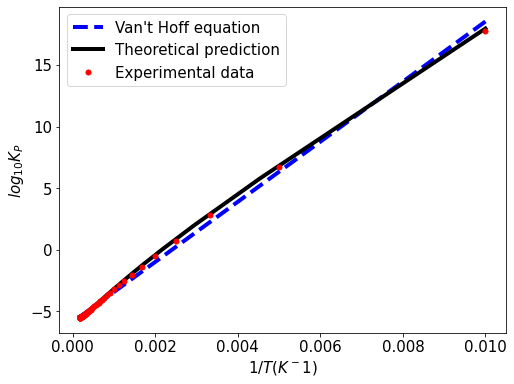

In [3]:

# import experiment data here
experiment_data = pd.read_csv("./Equilibrium_constant_for_Ammonia_data_nist.csv")

T_array = np.linspace(100, 6000)

# Van't Hoff equation fitting
def Vant_Hoff(x, a, b):
    return a*x + b

popt, pcov = curve_fit(Vant_Hoff, 1 / experiment_data['Temperature (K)'], experiment_data['log10(K_p)']) # find a, b
# popt : fit values
# pcov : variances

vant_hoff_result = Vant_Hoff(1 / T_array, *popt)

# previous theoretical prediction
theoretical_result = log10_K_f(T_array)


#plot results
plt.figure(figsize = (8,6))
plt.plot(1 / T_array, vant_hoff_result, 'b--', linewidth = 4, label = "Van't Hoff equation")
plt.plot(1 / T_array, theoretical_result, 'k-', linewidth = 4, label = "Theoretical prediction")
plt.plot(1 / experiment_data['Temperature (K)'], experiment_data['log10(K_p)'], 'ro', markersize = 5, label = "Experimental data")
plt.xlabel(r"$1 / T (K^-1)$",fontsize = 15)
plt.ylabel(r"$log_{10}K_P$",fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

이전에 구했던 Ammonia에서 구한 Theoretical result와 Van't Hoff equation을 실제 실험 데이터와 비교하는 그림을 그려봤습니다.

검은선과 파란 점선이 100% 일치하지는 않지만, 어느정도 비슷한 경향을 보인다는 것을 확인하실 수 있습니다.

실제 실험 결과를 통해서도 이 식이 어느정도 맞는다는 것을 확인할 수 있습니다. 물론

$$K_f = \frac{\Lambda_A(T)^{3/2}\Lambda_B(T)^{9/2}}{\Lambda_C(T)^3} \times \frac{P^\circ}{k_B T} \times \frac{q_{int,C}}{(q_{int,A})^{1/2} (q_{int,B})^{3/2}}$$


이라는 것을 고려한다면, $\triangle_r G^\circ$에도 Temperature dependent한 항이 있어 엄밀하게는 틀리다는 것을 알 수 있지만, 어느정도 맞는 식입니다.

-------------------------------

1889년, [**Svante Arrhenius**](https://www.wikiwand.com/en/Svante_Arrhenius)라는 스웨덴의 과학자는 이 Van't Hoff equation을 바탕으로 다음과 같은 식을 제안합니다.

$$k = A e^{-\frac{E_a}{RT}}$$

이 식이 바로 Arrhenius equation입니다. 

한가지 짚고 넘어가자면, 여기에서 $K$와 $k$는 다른 의미를 가지고 있습니다. $K$는 equilibrium constant이고, $k$는 reaction rate constant입니다.

즉, Van't Hoff equation에서 영감을 받아서 만들어 진 것이 Arrhenius equation이지만, Van't Hoff equation으로부터 Arrhenius equation가 유도된 것은 아닙니다.

이 식이 처음 제안되었을 때만 해도, Arrhenius equation은 reaction rate $k$ 와 activation energy $E_a$ 사이의 관계를 잘 밝히는 식으로 널리 알려지게 됩니다.

물론 앞에서 언급한 이유로 인해 지금은 이 식을 empirical equation으로 보고 있습니다.



이 식으로 설명할 수 있는 현상은 다음과 같습니다.

1. 온도가 높을수록 반응이 빠르게 일어납니다.

2. Activation energy가 높을수록 반응이 잘 일어나지 않습니다. ( = reaction rate가 감소합니다.)

3. Activation energy가 작아지면, 화학 반응이 온도에 상관없이 같은 속도로 일어납니다. ($k \cong A$가 되기에, reaction rate는 온도에 무관하게 됩니다.)

이 식은 엄밀하게 유도가 된 식은 아니지만, 많은 화학 반응 현상들이 이 식을 따른다는 사실이 밝혀졌습니다.

특히,

$$\ln k = ln A - \frac{E_a}{R} \frac{1}{T}$$

의 식에 맞춰 온도에 따른 reaction rate 데이터를 정리하면, activation energy를 구할 수 있게 되는데, 이를 Arrhenius plot이라고 합니다.

이 링크에 들어가보면, cyclopropane에서 propene으로의 isomerization에 대한 실험 데이터를 Arrhenius plot으로 그린 결과가 나옵니다.

(https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Kinetics/06%3A_Modeling_Reaction_Kinetics/6.02%3A_Temperature_Dependence_of_Reaction_Rates/6.2.03%3A_The_Arrhenius_Law/6.2.3.01%3A_Arrhenius_Equation)


---------------------------------------------------------------

Arrhenius equation은 쉽고 좋아보이는 식이지만, 수업시간에 설명한 Collision theory와 Transition state theory로 설명이 되지 않는 식입니다.

Collision theory가 맞다면, $k \cong T^{1/2} e^{-E_a / RT}$ 가 될 것이고, Transition state theory가 맞다면, $k \cong T e^{-E_a / RT}$가 됩니다.

(단 많은 reaction에서 collision theory는 잘 맞지 않는다고 합니다. 이로 인해 [**steric factor**](https://www.wikiwand.com/en/Steric_factor)라는 값을 더 고려한다고 하는데... 이는 생략합니다.)

이러한 이유 때문인지, 혹은 실제 실험이 original Arrhenius equation으로 설명이 되지 않아서 그런지는 모르겠지만, Modified Arrhenius equation이 존재합니다.

$$k = AT^n e^{-E_a / RT}$$

------------------------------------------------------------------

이 부분에서 제가 추가적으로 설명을 할 내용은 없습니다. 여러분들은 Collision theory와 Transition state theory로 reaction rate를 어떻게 구할 수 있는지,

또한 Transition state theory의 결과에서 Arrhenius equation을 만족하는 activation energy $E_a$를 어떻게 구하는지, 다시한번 복습해보시기 바랍니다.